# Life expectancy and GDP

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load data 
data = pd.read_csv('all_data.csv')

In [10]:
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [15]:
data.shape

(96, 4)

In [17]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [19]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [20]:
print(np.min(data['Life expectancy at birth (years)']))

44.3


In [21]:
print(np.max(data['Life expectancy at birth (years)']))

81.0


In [24]:
data = data.rename({"Life expectancy at birth (years)":"life_expectancy"}, axis = "columns")
data.head()

,Country,Year,life_expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Average life expectancy at birth by country

In [25]:
data_averages = data.drop("Year", axis = 1).groupby("Country").mean().reset_index()

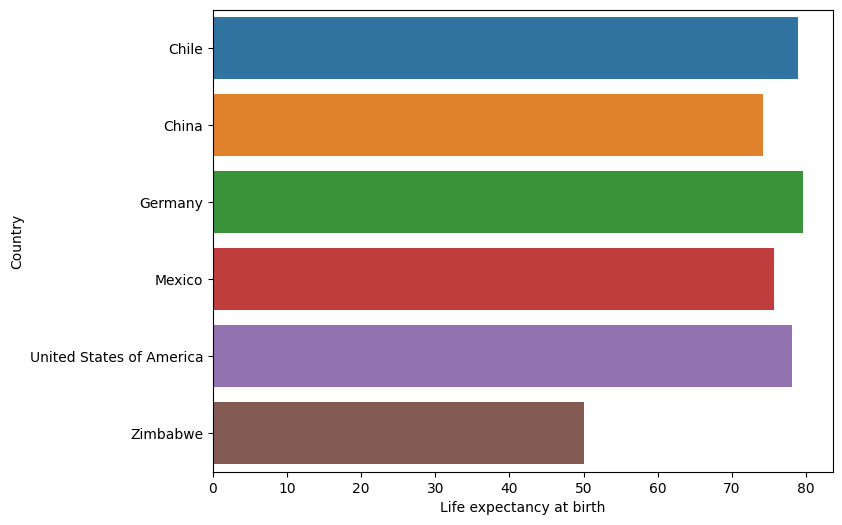

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x="life_expectancy", y="Country", data=data_averages)
plt.xlabel("Life expectancy at birth");

## GDP by country

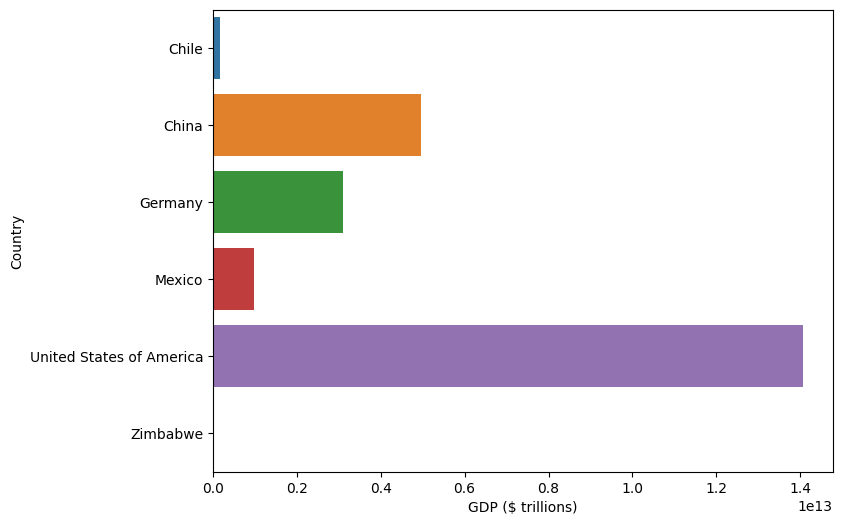

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=data_averages)
plt.xlabel("GDP ($ trillions)");

## GDP by year

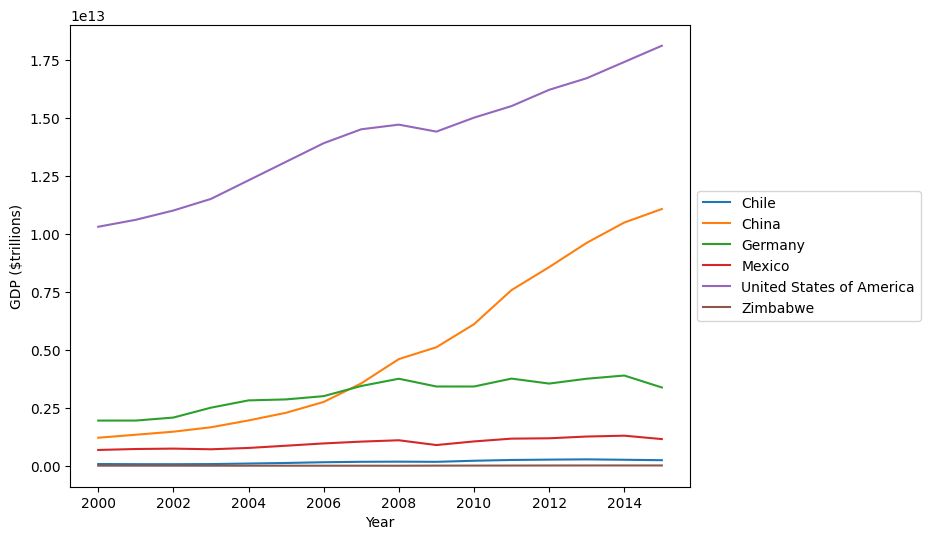

In [36]:
plt.figure(figsize=(8,6))
sns.lineplot(x=data.Year, y=data.GDP, hue=data.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP ($trillions)");

## Life expectancy by years

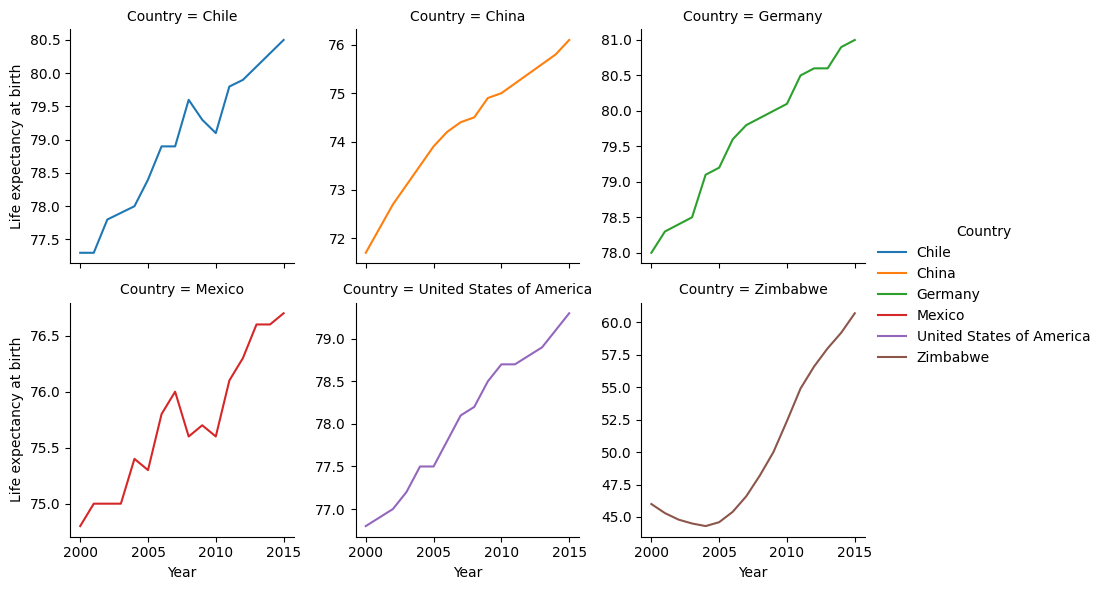

In [33]:
le_graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

le_graph = (le_graph.map(sns.lineplot,"Year","life_expectancy")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth"))

le_graph;

## Life expectancy vs. GDP

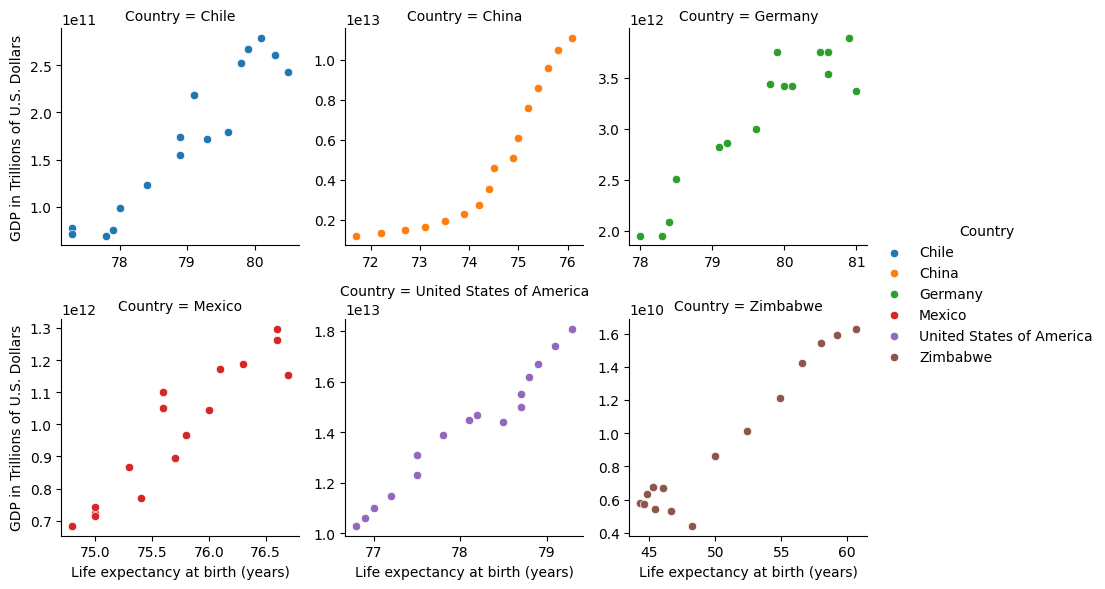

In [34]:
graph = sns.FacetGrid(data, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"life_expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
